<a href="https://colab.research.google.com/github/Mohican999370/Reverie/blob/master/ConvolutionNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolution Neural Network - for image classificaton algorithm

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2024-02-21 18:07:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.207, 142.251.107.207, 74.125.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   195MB/s    in 0.5s    

2024-02-21 18:07:42 (195 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
zip_ref
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
import os
len(os.listdir('pizza_steak/test/steak')),len(os.listdir('pizza_steak/test/pizza'))

(250, 250)

In [ ]:
!ls pizza_steak/test/pizza

1001116.jpg  1459760.jpg  2082495.jpg  254812.jpg   328965.jpg	 3785667.jpg  625434.jpg
1032754.jpg  1475479.jpg  2101820.jpg  2549661.jpg  3296507.jpg  3793004.jpg  645087.jpg
103708.jpg   1484836.jpg  2111981.jpg  2572488.jpg  3296907.jpg  380739.jpg   648055.jpg
1060407.jpg  148765.jpg   2124579.jpg  2582289.jpg  3316410.jpg  3814200.jpg  65128.jpg
106507.jpg   1503858.jpg  212995.jpg   2583389.jpg  331644.jpg	 3827990.jpg  666569.jpg
1067986.jpg  1506213.jpg  2157510.jpg  2605853.jpg  335474.jpg	 3898047.jpg  678708.jpg
1106738.jpg  1507019.jpg  2161321.jpg  2615100.jpg  3375083.jpg  3913440.jpg  714866.jpg
1119571.jpg  1512557.jpg  2165223.jpg  2619955.jpg  3376617.jpg  3919151.jpg  723745.jpg
11297.jpg    153195.jpg   2195935.jpg  2631321.jpg  3385460.jpg  395662.jpg   724290.jpg
1152100.jpg  1555015.jpg  2203687.jpg  2719697.jpg  3392194.jpg  397910.jpg   728260.jpg
1179703.jpg  1594097.jpg  2218680.jpg  2782998.jpg  341377.jpg	 398345.jpg   729262.jpg
1180001.jpg  1618659.jpg  

In [ ]:
### watching the dir and path in the os
import os
for dirnames,dirpath, filenames in  os.walk('pizza_steak'):
  print(f'{len(dirnames)} directories and {len(filenames)} images in {dir}')

11 directories and 0 images in <built-in function dir>
16 directories and 0 images in <built-in function dir>
22 directories and 250 images in <built-in function dir>
22 directories and 250 images in <built-in function dir>
17 directories and 0 images in <built-in function dir>
23 directories and 750 images in <built-in function dir>
23 directories and 750 images in <built-in function dir>


In [ ]:
# essentialy we are trying to find the size of dataset in both train and test set.
print(len(os.listdir('pizza_steak/train/steak')), len(os.listdir("pizza_steak/train/pizza")))
print(len(os.listdir("pizza_steak/test/steak")),len(os.listdir("pizza_steak/test/pizza")))

750 750
250 250


In [ ]:
# to get the class_names and images form the files using pathlib
from pathlib import Path
import glob
import numpy as np

data_dir = Path('pizza_steak/train/steak')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['1000205.jpg' '100135.jpg' '101312.jpg' '1021458.jpg' '1032846.jpg'
 '10380.jpg' '1049459.jpg' '1053665.jpg' '1068516.jpg' '1068975.jpg'
 '1081258.jpg' '1090122.jpg' '1093966.jpg' '1098844.jpg' '1100074.jpg'
 '1105280.jpg' '1117936.jpg' '1126126.jpg' '114601.jpg' '1147047.jpg'
 '1147883.jpg' '1155665.jpg' '1163977.jpg' '1190233.jpg' '1208405.jpg'
 '1209120.jpg' '1212161.jpg' '1213988.jpg' '1219039.jpg' '1225762.jpg'
 '1230968.jpg' '1236155.jpg' '1241193.jpg' '1248337.jpg' '1257104.jpg'
 '126345.jpg' '1264050.jpg' '1264154.jpg' '1264858.jpg' '127029.jpg'
 '1289900.jpg' '1290362.jpg' '1295457.jpg' '1312841.jpg' '1313316.jpg'
 '1324791.jpg' '1327567.jpg' '1327667.jpg' '1333055.jpg' '1334054.jpg'
 '1335556.jpg' '1337814.jpg' '1340977.jpg' '1343209.jpg' '134369.jpg'
 '1344105.jpg' '134598.jpg' '1346387.jpg' '1348047.jpg' '1351372.jpg'
 '1362989.jpg' '1367035.jpg' '1371177.jpg' '1375640.jpg' '1382427.jpg'
 '1392718.jpg' '1395906.jpg' '1400760.jpg' '1403005.jpg' '1404770.jpg'
 '140832.jpg' '

In [ ]:
# could use import fnmatch, fnmatch.filter(*.*)

In [ ]:
# visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):

  # target folder is the folder the dataset will be saved

   target_folder = target_dir + target_class


   # get random image from thedataset
   random_image = random.sample(os.listdir(target_folder), 1)
   print(random_image)

   # reading the image using the matplotlib

   img = mpimg.imread(target_folder +"/" +random_image[0])
   print(target_folder +"/" +random_image[0])
   plt.imshow(img)
   plt.title(target_class)
   plt.axis('off');

   print(f"Image shape: {img.shape}") # show the shape of the image
   return img




['670201.jpg']
pizza_steak/train/pizza/670201.jpg
Image shape: (512, 384, 3)


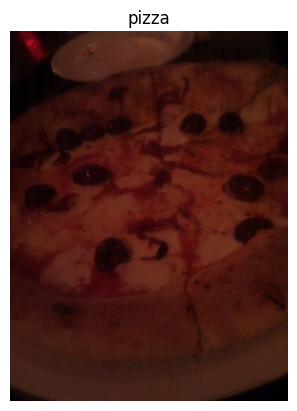

In [ ]:
img = view_random_image('pizza_steak/train/',  "pizza")

array([[[23,  3,  2],
        [24,  4,  3],
        [26,  4,  6],
        ...,
        [ 2,  0,  3],
        [ 2,  0,  3],
        [ 3,  1,  4]],

       [[22,  2,  1],
        [25,  5,  4],
        [27,  7,  8],
        ...,
        [ 2,  0,  3],
        [ 2,  0,  3],
        [ 3,  1,  4]],

       [[20,  2,  0],
        [24,  6,  4],
        [28,  8,  9],
        ...,
        [ 2,  0,  3],
        [ 3,  1,  4],
        [ 3,  1,  4]],

       ...,

       [[ 4,  3,  9],
        [ 3,  2,  8],
        [ 3,  1,  6],
        ...,
        [ 1,  1,  3],
        [ 1,  1,  3],
        [ 1,  1,  3]],

       [[ 4,  1,  8],
        [ 4,  1,  8],
        [ 3,  0,  7],
        ...,
        [ 1,  1,  3],
        [ 1,  1,  3],
        [ 1,  1,  3]],

       [[ 4,  1,  8],
        [ 4,  1,  8],
        [ 3,  0,  7],
        ...,
        [ 1,  1,  3],
        [ 1,  1,  3],
        [ 1,  1,  3]]], dtype=uint8)
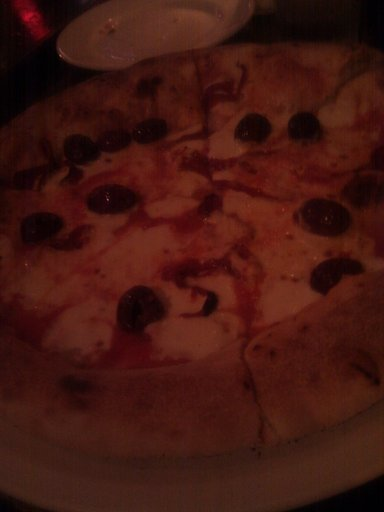

In [ ]:
img

In [ ]:
#### network architecture for cnn
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 # for reproducibility

tf.random.set_seed(42)

train_data_gen = ImageDataGenerator(rescale = 1./255)
valid_data_gen = ImageDataGenerator(rescale = 1./255) # validation data

# dividing into train and
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# transfering the data from dir to into batches
train_data = train_data_gen.flow_from_directory(train_dir,
                                                 batch_size = 32,
                                                 target_size = (224,224),
                                                  class_mode = 'binary',
                                                  seed =42)
valid_data = valid_data_gen.flow_from_directory(test_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = 'binary',
                                              seed = 42)

# cnn model

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size =3,activation = 'relu',input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3,activation ='relu'),
    tf.keras.layers.MaxPool2D(pool_size =2, padding ='valid'),
    tf.keras.layers.Conv2D(10, 3,activation ='relu'),
    tf.keras.layers.Conv2D(10, 3,activation ='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation ='sigmoid')])

model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs =5,
                        steps_per_epoch = len(train_data),
                        validation_data= valid_data,
                        validation_steps = len(valid_data))










Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 111s 2s/step - loss: 0.6292 - accuracy: 0.6593 - val_loss: 0.4597 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 100s 2s/step - loss: 0.4593 - accuracy: 0.7980 - val_loss: 0.3639 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 99s 2s/step - loss: 0.4404 - accuracy: 0.7960 - val_loss: 0.3755 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 97s 2s/step - loss: 0.3867 - accuracy: 0.8293 - val_loss: 0.4006 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 109s 2s/step - loss: 0.3554 - accuracy: 0.8527 - val_loss: 0.4773 - val_accuracy: 0.7700


Text(0, 0.5, 'loss')

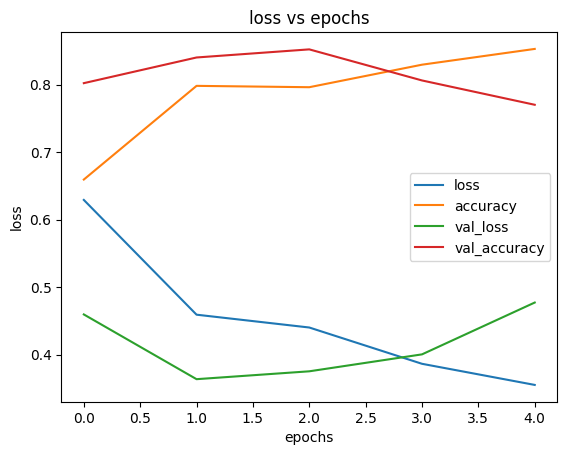

In [ ]:
# plt the graph to see the realtion of loss with epochs
import pandas as pd
pd.DataFrame(history_1.history).plot()
plt.title('loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
#### network architecture for cnn
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 # for reproducibility

tf.random.set_seed(42)

train_data_gen = ImageDataGenerator(rescale = 1./255)
valid_data_gen = ImageDataGenerator(rescale = 1./255) # validation data

# dividing into train and
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# transfering the data from dir to into batches
train_data = train_data_gen.flow_from_directory(train_dir,
                                                 batch_size = 32,
                                                 target_size = (224,224),
                                                  class_mode = 'binary',
                                                  seed =42)
valid_data = valid_data_gen.flow_from_directory(test_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = 'binary',
                                              seed = 42)

# cnn model

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten( input_shape =(224, 224, 3)),
    tf.keras.layers.Dense(50,activation = 'relu'),

    tf.keras.layers.Dense(50,activation ='relu'),
    tf.keras.layers.Dense(50, activation ='relu'),

    tf.keras.layers.Dense(1, activation ='sigmoid')])

model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# fit the model
history_3 = model_3.fit(train_data,
                        epochs =5,
                        steps_per_epoch = len(train_data),
                        validation_data= valid_data,
                        validation_steps = len(valid_data))










Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 255ms/step - loss: 1.1621 - accuracy: 0.6800 - val_loss: 0.6465 - val_accuracy: 0.6560
Epoch 2/5
47/47 [==============================] - 10s 222ms/step - loss: 0.5380 - accuracy: 0.7493 - val_loss: 0.5288 - val_accuracy: 0.7300
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.5337 - accuracy: 0.7533 - val_loss: 0.6575 - val_accuracy: 0.6840
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.5438 - accuracy: 0.7547 - val_loss: 0.4993 - val_accuracy: 0.7480
Epoch 5/5
47/47 [==============================] - 12s 258ms/step - loss: 0.4779 - accuracy: 0.7813 - val_loss: 0.4388 - val_accuracy: 0.8040


<Axes: >

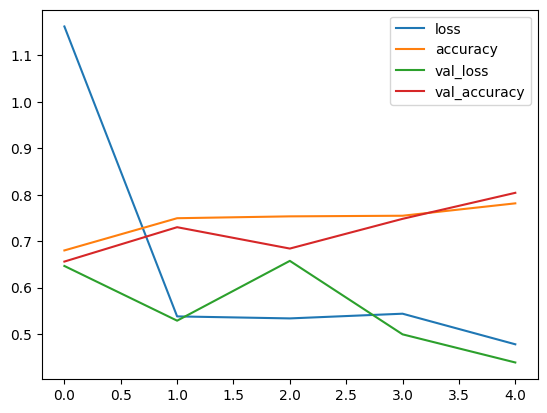

In [ ]:
pd.DataFrame(history_3.history).plot()

test accuracy of 77% and train accuracy of 80% the model is good as cnn model. :)

In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 50)                7526450   
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7531601 (28.73 MB)
Trainable params: 7531601 (28.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale = 1./255)
valid_data_gen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_data_gen.flow_from_directory(directory = train_dir,
                                 target_size = (244,244),
                                 class_mode ='binary',
                                 batch_size = 32)

Found 1500 images belonging to 2 classes.


In [ ]:
# after procesing we can observe how the data size has changed
images,labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data), len(valid_data)

(47, 16)

Model  : Base on Conv2d and Mazpooling but lighter layers.# New Section

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 # for reproducibility

tf.random.set_seed(42)

train_data_gen = ImageDataGenerator(rescale = 1./255)
test_data_gen = ImageDataGenerator(rescale = 1./255) # validation data

# dividing into train and
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# transfering the data from dir to into batches
train_data = train_data_gen.flow_from_directory(train_dir,
                                                 batch_size = 32,
                                                 target_size = (224,224),
                                                  class_mode = 'binary',
                                                  seed =42)
test_data = test_data_gen.flow_from_directory(test_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = 'binary',
                                              seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = (2,2),strides =(2,2), input_shape =(224,224,3),activation ='relu'),
    tf.keras.layers.MaxPool2D(pool_size =2),
    tf.keras.layers.Conv2D(10,3,activation ='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation ='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation ='sigmoid')
])

model5.compile(loss ='binary_crossentropy',
               metrics=['accuracy'],
               optimizer =tf.keras.optimizers.Adam()),

history5 =model5.fit(train_data,steps_per_epoch = 47,validation_data =test_data,validation_steps = 16, epochs =5)

Epoch 1/5
47/47 [==============================] - 15s 304ms/step - loss: 0.6831 - accuracy: 0.5600 - val_loss: 0.6410 - val_accuracy: 0.6300
Epoch 2/5
47/47 [==============================] - 14s 297ms/step - loss: 0.5716 - accuracy: 0.6873 - val_loss: 0.4536 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 17s 354ms/step - loss: 0.4759 - accuracy: 0.7667 - val_loss: 0.3739 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 14s 302ms/step - loss: 0.4262 - accuracy: 0.8047 - val_loss: 0.3586 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 14s 300ms/step - loss: 0.4007 - accuracy: 0.8193 - val_loss: 0.3320 - val_accuracy: 0.8680


In [ ]:
model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 112, 112, 10)      130       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 56, 56, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 54, 54, 10)        910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 10)       

<Axes: >

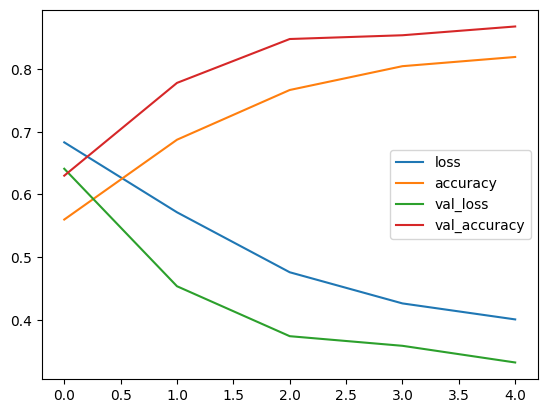

In [ ]:
import pandas as pd
pd.DataFrame(history5.history).plot()

In [ ]:
### when you observe that the dataset is overfitting in this case the validation errorr increse or accuracy devcrease
# it could be due to overfitting, by data augumnetation we can decrease the overfitting


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_augumented = ImageDataGenerator(rescale = 1./225.,
                                     rotation_range =20,
                                     shear_range =0.2,
                                     zoom_range =0.2,
                                     width_shift_range =0.2,
                                     height_shift_range =0.2,
                                     horizontal_flip =True)
train_data_gen = ImageDataGenerator(rescale = 1./255.)
test_data_gen = ImageDataGenerator(rescale =1./255.)


train_data_augumented = data_augumented.flow_from_directory(train_dir,
                                                            batch_size =32,
                                                            target_size =(244,244),
                                                            class_mode ='binary',
                                                            shuffle =False,
                                                            # we prefer not to shuffele to seethe effct
                                                            seed =42)

Found 1500 images belonging to 2 classes.


In [ ]:
len(train_data_augumented)

47

(-0.5, 223.5, 223.5, -0.5)

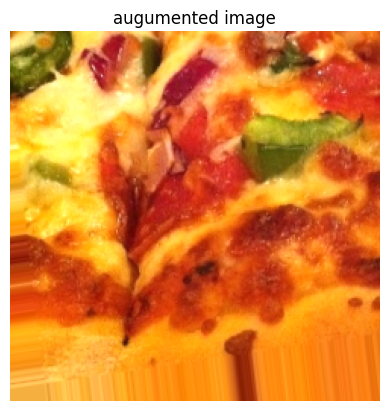

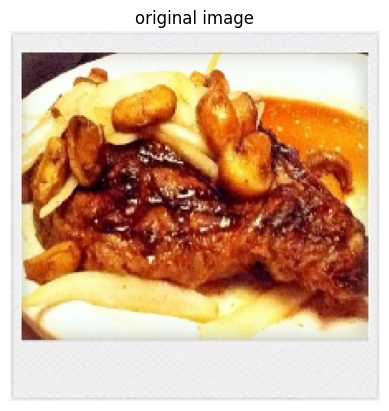

In [ ]:
aug_images,aug_labels = train_data_augumented.next()
random_num = random.randint(0,31)
image, labels = train_data.next()

#from matplotlib.image import mpimg
import random
random.seed(42)

plt.imshow(aug_images[random_num])
plt.title(f'augumented image')
plt.axis(False)
plt.figure()
plt.imshow(image[random_num])
plt.title(f'original image')
plt.axis(False)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Conv2D
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

train_dir ='pizza_steak/train'
test_dir ='pizza_steak/test'

train_data_augumented = ImageDataGenerator(rescale =1./255.,
                                           rotation_range= 0.2,
                                           shear_range =0.3,
                                           zoom_range =0.2,
                                           width_shift_range =0.2,
                                           height_shift_range =0.2)
test_data_gen = ImageDataGenerator(rescale =1./255.)
train_data_aug = train_data_augumented.flow_from_directory(train_dir,
                                                           batch_size =32,
                                                           target_size =(224,224),
                                                           class_mode= 'binary',
                                                           shuffle= False,
                                                           seed =42)
test_data = test_data_gen.flow_from_directory(test_dir,batch_size =32,
                                              target_size =(224,224),
                                              class_mode ='binary',
                                              seed =42
                                              )

model_6 = tf.keras.Sequential([
    Conv2D(filters = 10,
           kernel_size =3,
           activation ='relu',
           input_shape=(224,224,3)),
    Conv2D(filters = 10,
           kernel_size =3,
           activation ='relu'),
    MaxPool2D(2),
    Conv2D(10,3,activation ='relu'),
    Conv2D(10,3,activation ='relu'),

    MaxPool2D(),

    Flatten(),
    Dense(1,activation ='sigmoid')
    ])

model_6.compile(loss ='binary_crossentropy',
                optimizer= Adam(),
                metrics = ['accuracy'])

history_6 = model_6.fit(train_data_aug,
                        epochs =5,
                        steps_per_epoch = len(train_data_aug),
                        validation_data= test_data,
                        validation_steps= len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 124s 3s/step - loss: 0.7130 - accuracy: 0.4487 - val_loss: 0.6919 - val_accuracy: 0.5480
Epoch 2/5
47/47 [==============================] - 112s 2s/step - loss: 0.7052 - accuracy: 0.5380 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 122s 3s/step - loss: 0.6925 - accuracy: 0.5167 - val_loss: 0.6804 - val_accuracy: 0.6040
Epoch 4/5
47/47 [==============================] - 113s 2s/step - loss: 0.6628 - accuracy: 0.6013 - val_loss: 0.6242 - val_accuracy: 0.7400
Epoch 5/5
47/47 [==============================] - 135s 3s/step - loss: 0.6303 - accuracy: 0.6487 - val_loss: 0.6148 - val_accuracy: 0.7260


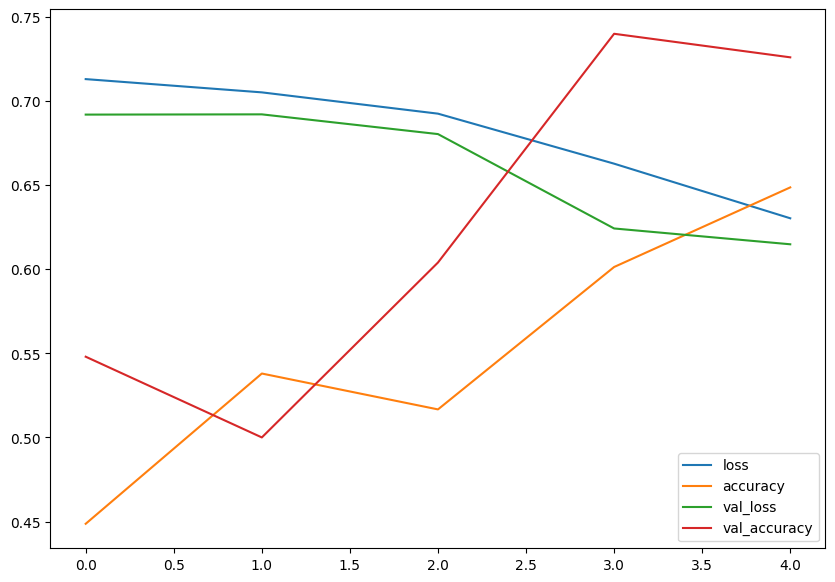

In [ ]:
# plot the curve
import pandas as pd
pd.DataFrame(history_6.history).plot(figsize =(10,7))


def plt_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  import matplotlib.pyplot as plt
# plot loss
  plt.figure()
  plt.title('loss curve')
  plt.plot(epochs,loss,label ='training loss')
  plt.plot(epochs, val_loss, label ='val_loss')
  plt.legend()

  plt.figure()
  plt.title('accuracy curve')
  plt.plot(epochs, accuracy, label ='accuracy')
  plt.plot(epochs, val_accuracy, label ='val_accuracy')
  plt.legend();




In [ ]:
# using augumented data with no shuffking we were able to introduce less overfitting, as we can observe
#improvement in the val accuracy over training ccuracy.
model_6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

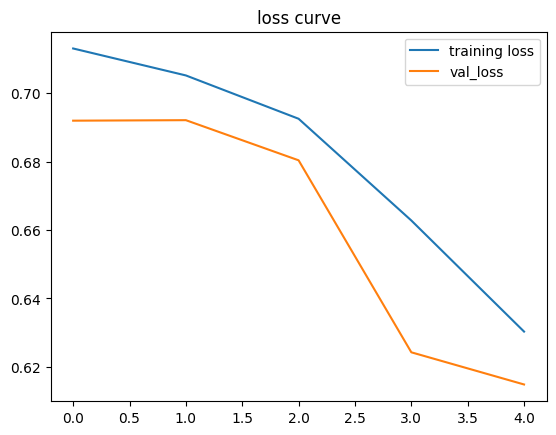

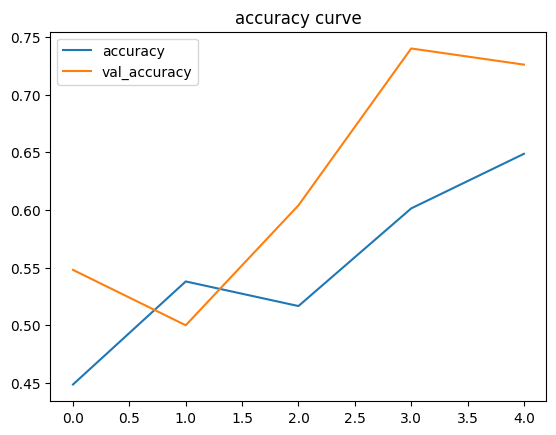

In [ ]:
plt_curve(history_6)

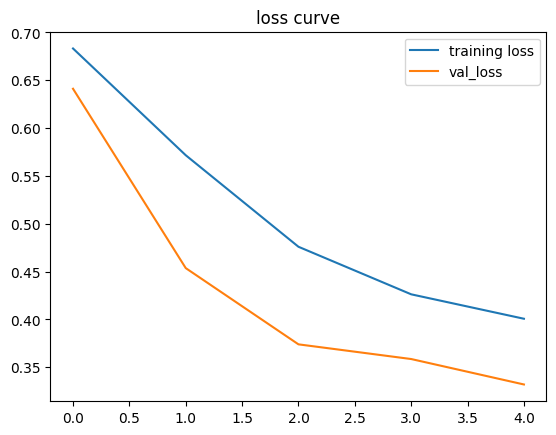

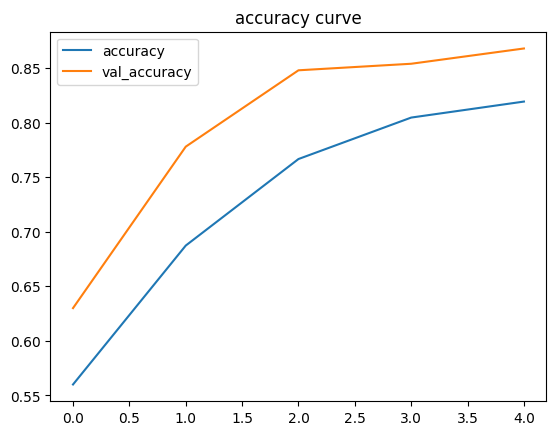

In [ ]:
plt_curve(history5)

In [ ]:
#### creating model_7 with shuffle so the data is more prepared and less data augumentation


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2024-02-21 21:04:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2024-02-21 21:04:17 (31.8 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



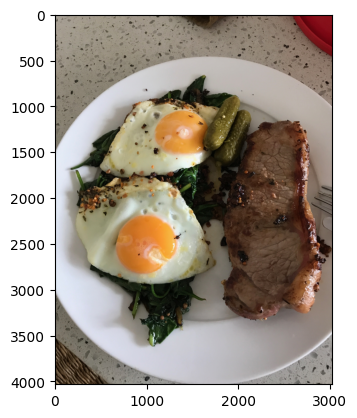

In [ ]:
# read the jpeg file
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

steak = mpimg.imread('03-steak.jpeg')

plt.imshow(steak)
plt.show()

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
# since the image is not the shape we ahvre,
#we have to use image data generator or


In [ ]:
def load_and_prep_image(filename,image_shape =224):

  #read the file
  img = tf.io.readfile(filename)


  # decode the file into tensor and ensure 3 colors
  img =tf.image.decode_image(img, channels =3)

  # resize the image to the same size of the model has been trained.
  img = tf.image.resize(img,size = [img_shape, img_shape])


  # rescale the image to get all values in 0  and 1
  img = img/255
  return img



In [ ]:
steak =view_image('03-steak.jpeg', image_shape = 224)
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
def view_image(filename, image_shape=244):

  # the size of the photo that has been uploaded is different,
  #we can try and using the io.readimage function

  image = tf.io.read_file(filename) #read the file

  #decode the file
  image = tf.image.decode_image(image,channels =3)

# resize the image

  image = tf.image.resize(image,size =[image_shape, image_shape])

# normalize
  image = image/255
  return image


In [ ]:
steak.shape

TensorShape([224, 224, 3])

In [ ]:
# add extra dimension into steak, sinc it doesnot have the batch size.


steak =tf.expand_dims(steak, axis =0)
steak.shape

TensorShape([1, 224, 224, 3])

In [ ]:
pred =model5.predict(steak)

1/1 [==============================] - 0s 167ms/step


In [ ]:
class_1 = ['pizza','steak']
int(tf.round(pred[0][0]))
pred_class =class_1[int(tf.round(pred[0][0]))]
pred_class

'steak'

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
##### NOTHER prediction
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg


--2024-02-21 20:06:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2024-02-21 20:06:44 (41.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



In [ ]:
view_image('03-pizza-dad.jpeg')

<tf.Tensor: shape=(244, 244, 3), dtype=float32, numpy=
array([[[0.31417313, 0.32687005, 0.2781397 ],
        [0.48650688, 0.5178794 , 0.4355265 ],
        [0.72674626, 0.7463541 , 0.66792274],
        ...,
        [0.05474139, 0.06650609, 0.03905511],
        [0.0510646 , 0.07067244, 0.04322146],
        [0.07483833, 0.08660303, 0.05915204]],

       [[0.9545089 , 0.96235204, 0.95283735],
        [0.9518725 , 0.9591692 , 0.9681374 ],
        [0.95600206, 0.96182007, 0.9639737 ],
        ...,
        [0.03619401, 0.05580185, 0.02835087],
        [0.05689942, 0.06866413, 0.04121314],
        [0.05644531, 0.06821002, 0.04075904]],

       [[0.1204452 , 0.13613147, 0.14005303],
        [0.09295245, 0.10863872, 0.10606246],
        [0.14777048, 0.15523183, 0.1524556 ],
        ...,
        [0.08517763, 0.09694234, 0.06949135],
        [0.06294114, 0.07470585, 0.04725487],
        [0.05252374, 0.07997473, 0.04860217]],

       ...,

       [[0.24660663, 0.1642537 , 0.08190076],
        [0.24

In [ ]:
#### create a function where any photo can be uploaded, read, fited and then predicted.

def predict_new_photo(filename,class_1, model ):

  # read and decode the image using written function
   image1 = view_image(filename)

   # expand the dims.
   image2 = tf.expand_dims(image1, axis =0)

    # predict the image

   pred = model.predict(image2)
    # take the probability and put it in a class
   class_1 =['pizza','steak']
   # Get the predicted class
      if len(pred[0]) > 1: # check for multi-class
         pred_class = class_names[pred.argmax()] # if more than one output, take the max
      else:
         pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round


  pred_class = class_1[int( tf.round(pred[0][0]))]

   plt.imshow(image1)
   return pred_class


In [ ]:
#predict_new_photo('03-steak.jpeg',class_1,model5)

In [ ]:
image1 = view_image('03-pizza-dad.jpeg')
image1.shape

   # expand the dims.
image2 = tf.expand_dims(image1, axis =0)
image2.shape


TensorShape([1, 244, 244, 3])

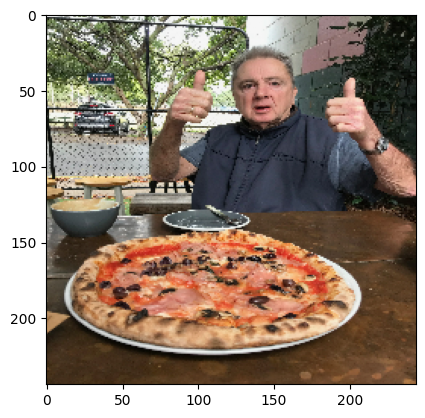

In [ ]:
plt.imshow(image1)

In [ ]:
pzza = view_image('03-pizza-dad.jpeg')
pzza =tf.expand_dims(pzza,axis =0)
pzza.shape

TensorShape([1, 244, 244, 3])

In [ ]:
model5.predict(steak)

1/1 [==============================] - 0s 21ms/step


array([[0.86545223]], dtype=float32)

In [ ]:
#predict_new_photo('03-pizza-dad.jpeg',class_1,model5)

Multiclass model

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-02-22 23:42:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.207, 142.250.152.207, 142.250.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  42.9MB/s    in 6.8s    

2024-02-22 23:42:45 (72.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import zipfile
zipref = zipfile.ZipFile('10_food_classes_all_data.zip')
zipref.extractall()


In [4]:
import os
import glob
from pathlib import Path
food_dir = Path('10_food_classes_all_data')



for dirnames, dirpath,filenames in os.walk('10_food_classes_all_data'):
  print(f'directories with {(dirnames[30:])} and the number of {len(filenames)} images')

directories with  and the number of 0 images
directories with  and the number of 0 images
directories with /grilled_salmon and the number of 750 images
directories with /steak and the number of 750 images
directories with /sushi and the number of 750 images
directories with /chicken_curry and the number of 750 images
directories with /hamburger and the number of 750 images
directories with /chicken_wings and the number of 750 images
directories with /pizza and the number of 750 images
directories with /ice_cream and the number of 750 images
directories with /ramen and the number of 750 images
directories with /fried_rice and the number of 750 images
directories with  and the number of 0 images
directories with grilled_salmon and the number of 250 images
directories with steak and the number of 250 images
directories with sushi and the number of 250 images
directories with chicken_curry and the number of 250 images
directories with hamburger and the number of 250 images
directories with

In [5]:
# listing the data in the directory the other way
os.listdir('10_food_classes_all_data')

['train', 'test']

In [6]:
len(os.listdir('10_food_classes_all_data/train')), len(os.listdir('10_food_classes_all_data/test')), # 10 classes in train and test.

(10, 10)

In [7]:
# classes in the directories.
!ls '10_food_classes_all_data/train'

chicken_curry  fried_rice      hamburger  pizza  steak
chicken_wings  grilled_salmon  ice_cream  ramen  sushi


In [8]:
### observing the file stored in the directory
!ls '10_food_classes_all_data/train/chicken_curry/128873.jpg'

10_food_classes_all_data/train/chicken_curry/128873.jpg


array([[[233, 228, 225],
        [233, 228, 225],
        [233, 228, 225],
        ...,
        [207, 206, 201],
        [205, 204, 199],
        [203, 202, 197]],

       [[202, 197, 194],
        [202, 197, 194],
        [203, 198, 195],
        ...,
        [213, 212, 207],
        [211, 210, 205],
        [207, 206, 201]],

       [[203, 198, 195],
        [203, 198, 195],
        [204, 199, 196],
        ...,
        [213, 212, 208],
        [212, 211, 207],
        [208, 207, 203]],

       ...,

       [[246, 255, 247],
        [246, 255, 247],
        [248, 255, 247],
        ...,
        [235, 234, 229],
        [234, 233, 228],
        [234, 233, 228]],

       [[246, 255, 247],
        [246, 255, 247],
        [246, 255, 247],
        ...,
        [234, 234, 226],
        [233, 233, 225],
        [233, 233, 225]],

       [[246, 255, 247],
        [246, 255, 247],
        [246, 255, 247],
        ...,
        [233, 233, 225],
        [232, 232, 224],
        [232, 232, 224]]], dtype=uint8)
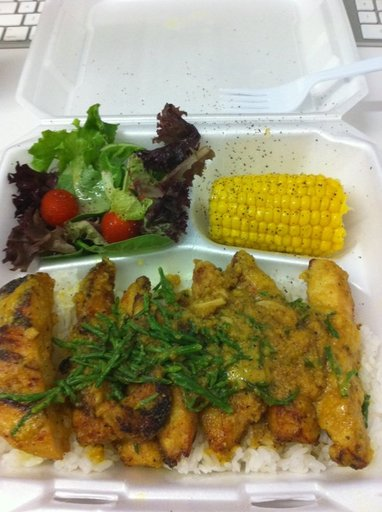

In [9]:
# read the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('10_food_classes_all_data/train/chicken_curry/128873.jpg')
img

In [10]:
!ls '10_food_classes_all_data/train/grilled_salmon'


1002334.jpg  1574226.jpg  2033371.jpg  2521945.jpg  3075598.jpg  356724.jpg   590486.jpg
1018852.jpg  1574235.jpg  2041462.jpg  2526124.jpg  3092186.jpg  358495.jpg   593047.jpg
1019062.jpg  1588522.jpg  2042270.jpg  2528657.jpg  3101139.jpg  3596632.jpg  602289.jpg
1026062.jpg  16028.jpg	  2046233.jpg  2536191.jpg  3104499.jpg  3637618.jpg  606368.jpg
1053214.jpg  1612638.jpg  2047051.jpg  2538730.jpg  3105440.jpg  3639332.jpg  606912.jpg
105849.jpg   1614188.jpg  2048041.jpg  2540326.jpg  3106578.jpg  3640220.jpg  609651.jpg
1072372.jpg  1615378.jpg  2049741.jpg  2543910.jpg  3108875.jpg  3640477.jpg  622250.jpg
1081169.jpg  1619958.jpg  2063031.jpg  2547500.jpg  3114549.jpg  3640690.jpg  624910.jpg
1081495.jpg  1621401.jpg  206597.jpg   2558618.jpg  3118248.jpg  3641873.jpg  629619.jpg
1081907.jpg  1624832.jpg  2067717.jpg  2567094.jpg  3120110.jpg  3642240.jpg  634445.jpg
1092684.jpg  1625791.jpg  2068119.jpg  2568094.jpg  3121105.jpg  3654461.jpg  63518.jpg
1100939.jpg  1630013.jp

array([[[178, 187, 194],
        [177, 186, 193],
        [177, 186, 195],
        ...,
        [158, 171, 180],
        [155, 168, 177],
        [156, 169, 178]],

       [[177, 186, 193],
        [176, 185, 192],
        [176, 185, 194],
        ...,
        [158, 171, 180],
        [156, 169, 178],
        [157, 170, 179]],

       [[177, 186, 193],
        [176, 185, 192],
        [176, 185, 194],
        ...,
        [159, 172, 181],
        [158, 171, 180],
        [158, 171, 180]],

       ...,

       [[148, 144, 145],
        [149, 145, 146],
        [150, 146, 145],
        ...,
        [229, 238, 233],
        [229, 238, 233],
        [229, 238, 233]],

       [[165, 159, 161],
        [166, 160, 162],
        [166, 162, 163],
        ...,
        [229, 238, 233],
        [229, 238, 233],
        [229, 238, 233]],

       [[200, 194, 196],
        [202, 196, 198],
        [202, 198, 199],
        ...,
        [227, 236, 231],
        [227, 236, 231],
        [226, 235, 230]]], dtype=uint8)
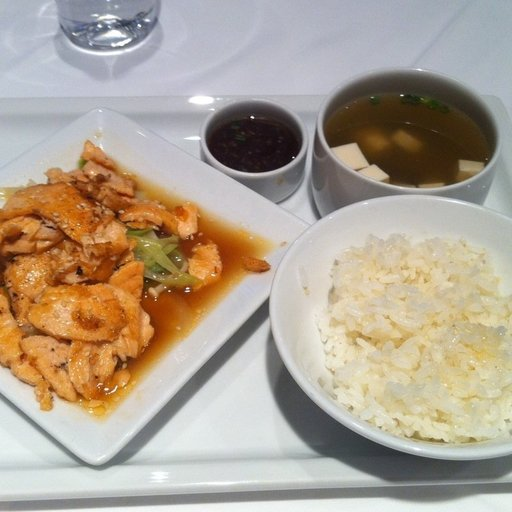

In [11]:
# observing other pictures
img2 = mpimg.imread('10_food_classes_all_data/train/grilled_salmon/587940.jpg')
img2

In [ ]:
#### the steps for processing the data.
#1. extract the data in the format for neural processing.
  # a. use imagedatageenrator, flow_from_directory and normalizing method to preprocess the pictures.

#2. create a model , evaluate, and predict the model.

In [12]:
#### import all the necessary libs
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir_multiclass = '10_food_classes_all_data/train'
test_dir_multiclass = '10_food_classes_all_data/test'


train_data_gen = ImageDataGenerator(rescale = 1./255)
test_data_gen = ImageDataGenerator(rescale = 1./255)


# using flow from dir
train_data = train_data_gen.flow_from_directory(directory = train_dir_multiclass,
                                                batch_size =32,
                                                target_size = (224,224),
                                                class_mode = 'categorical',
                                                seed = 42)
test_data = test_data_gen.flow_from_directory(directory = test_dir_multiclass,
                                              batch_size = 32,
                                              target_size =(224,224),
                                              class_mode = 'categorical',
                                              seed = 42)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [13]:
##### model prepration

# import the libararies

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy


model_9 = Sequential([
    Conv2D(filters = 10, kernel_size = (3,3), activation ='relu', input_shape = (224,224,3)), # height,weight, 3 colors
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    Conv2D(10,3, activation ='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation = 'softmax')])   # softmax for categorical variables
# 10 output for 10 classes.

model_9.compile(loss = 'categorical_crossentropy',
                optimizer= Adam(),
                metrics =['accuracy'])

history_9 = model_9.fit(train_data,
                        steps_per_epoch = len(train_data),
                        epochs= 5,
                        validation_data =test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 546s 2s/step - loss: 2.1303 - accuracy: 0.2171 - val_loss: 1.9688 - val_accuracy: 0.3036
Epoch 2/5
235/235 [==============================] - 552s 2s/step - loss: 1.8474 - accuracy: 0.3677 - val_loss: 1.9331 - val_accuracy: 0.3208
Epoch 3/5
235/235 [==============================] - 551s 2s/step - loss: 1.4099 - accuracy: 0.5320 - val_loss: 1.9870 - val_accuracy: 0.3336
Epoch 4/5
235/235 [==============================] - 538s 2s/step - loss: 0.8269 - accuracy: 0.7363 - val_loss: 2.4856 - val_accuracy: 0.2892
Epoch 5/5
235/235 [==============================] - 533s 2s/step - loss: 0.3275 - accuracy: 0.9052 - val_loss: 3.7420 - val_accuracy: 0.2684


<Axes: >

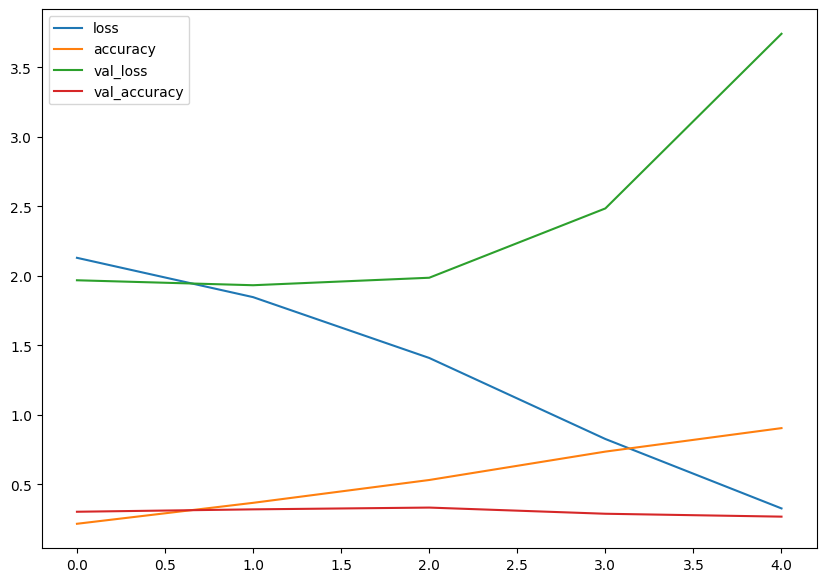

In [14]:
 pd.DataFrame(history_9.history).plot(figsize=(10,7))  # plot to observe the epochs vs loss

In [15]:
### lets look at the prediction

model_9.evaluate(test_data)


79/79 [==============================] - 52s 651ms/step - loss: 3.7420 - accuracy: 0.2684


[3.7419562339782715, 0.26840001344680786]

In [16]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [17]:
### create the predict and plot for unknow pictures.
###3 lcone_model

model_11 = tf.keras.models.clone_model(model_9)

In [20]:
train_data_augumented = ImageDataGenerator(rescale =1./255,
                                           rotation_range = 0.2,
                                           shear_range= 0.3,
                                           height_shift_range= 0.3,
                                           width_shift_range =0.3,
                                           zoom_range =0.3,
                                           horizontal_flip = True)
train_data_augu = train_data_augumented.flow_from_directory(train_dir_multiclass,
                                                                  class_mode ='categorical',
                                                                  batch_size =32,
                                                                  target_size = (224,224),
                                                                  seed =42)

Found 7500 images belonging to 10 classes.


In [27]:
model_11.compile(loss =tf.keras.losses.categorical_crossentropy,
                 optimizer = Adam(),
                 metrics =['accuracy'])
history_11= model_11.fit(train_data_augu,
                         steps_per_epoch =len(train_data_augu),
                         validation_data = test_data,
                         validation_steps = len(test_data))

235/235 [==============================] - 623s 3s/step - loss: 2.2280 - accuracy: 0.1676 - val_loss: 2.0597 - val_accuracy: 0.2504


(3024, 4032, 3)

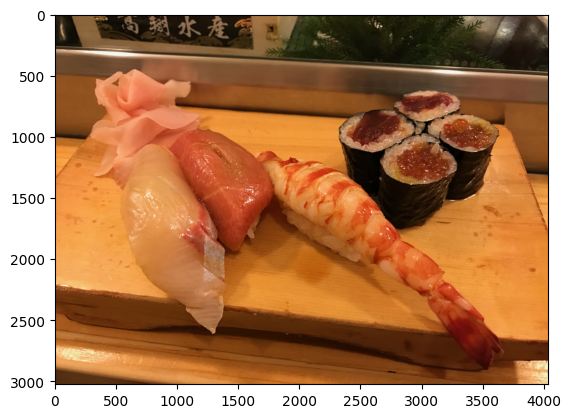

In [32]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

sushi = mpimg.imread('03-sushi.jpeg')
plt.imshow(sushi)
sushi.shape

In [33]:
# to pass the photo through pur model, we have to convert it into preprocessing format
def view_image(filename, image_shape=244):

  # the size of the photo that has been uploaded is different,
  #we can try and using the io.readimage function

  image = tf.io.read_file(filename) #read the file

  #decode the file
  image = tf.image.decode_image(image,channels =3)

# resize the image

  image = tf.image.resize(image,size =[image_shape,image_shape])

# normalize
  image = image/255
  return image


In [40]:
sushi =view_image('03-sushi.jpeg')
sushi = tf.expand_dims(sushi,axis =0)
sushi.shape

TensorShape([1, 244, 244, 3])

In [1]:
# lets check prediction on this pictures.
#model_9.predict(sushi)